### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 10th at 11.59pm CST
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

In [1]:
#IMPORTS
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from scipy.stats import laplace

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import time



In [2]:
filename = '../../homeworks/hw_data/hw7_data_1.npy' 
dataset = np.load(filename)
X_1 = dataset[:,0]
X_2 = dataset[:,1]

X = dataset[:,0:2]
y = dataset[:,2]
y_err = dataset[:,3]


Text(0.5, 0, 'feature 1')

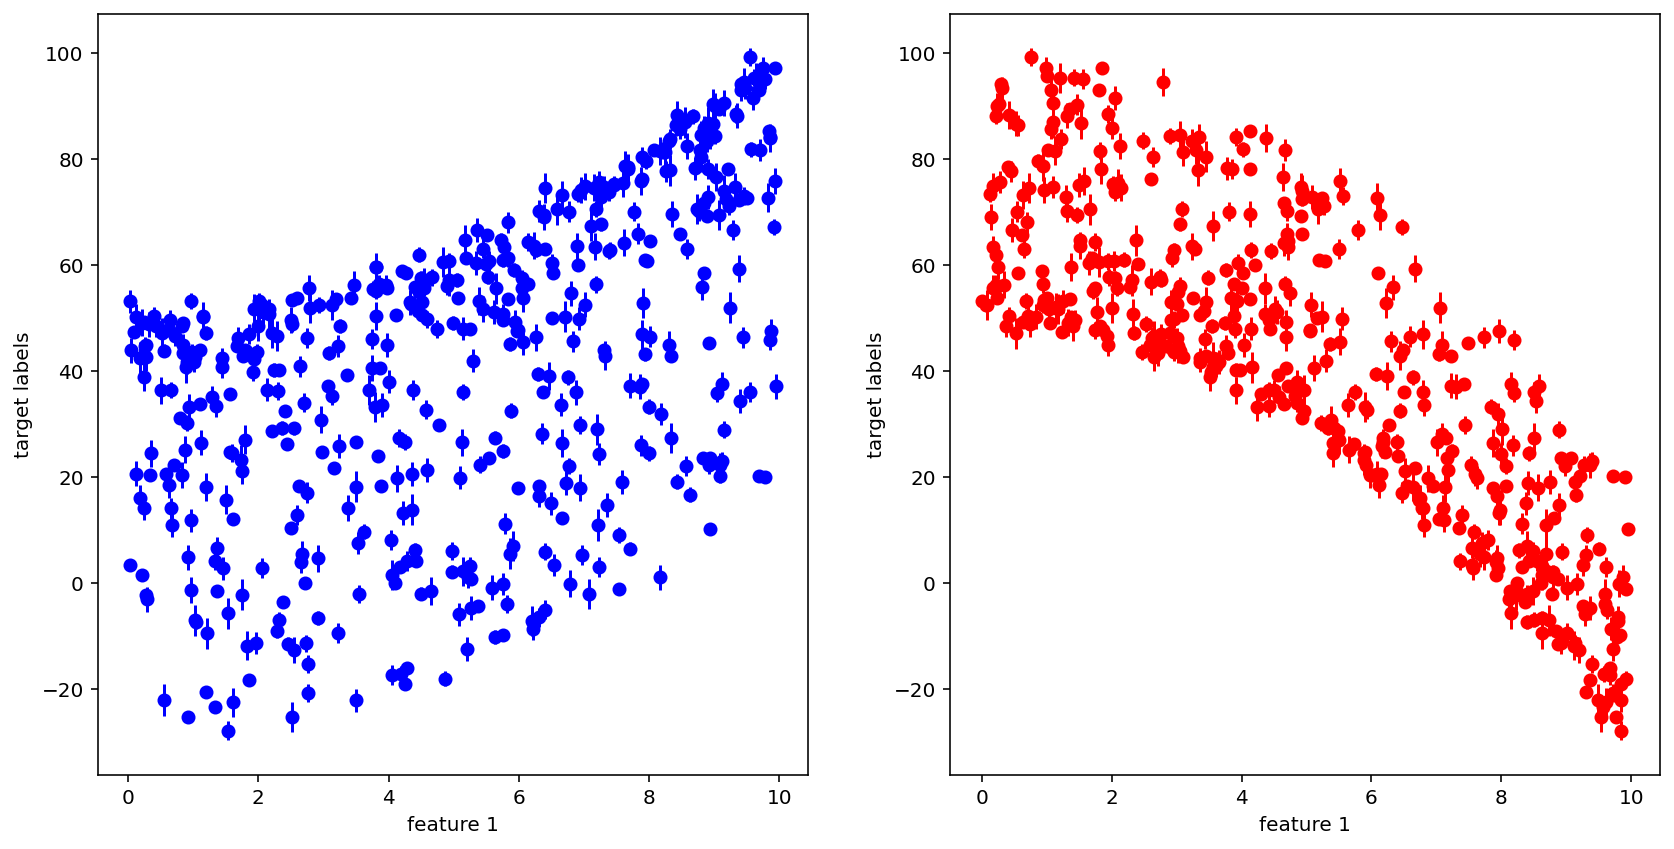

In [3]:
fig = plt.figure(figsize=(14,7))
fe1 = fig.add_subplot(121)
fe1.errorbar(X[:,0],y, yerr= y_err,  color = 'b', marker = 'o', ls='none')
fe1.set_ylabel('target labels')
fe1.set_xlabel('feature 1')

fe2 = fig.add_subplot(122)
fe2.errorbar(X[:,1],y, yerr =y_err, color = 'r', marker = 'o', ls='none')
fe2.set_ylabel('target labels')
fe2.set_xlabel('feature 1')


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

### Multivariate linear regression 

If $X$ is instead multivariate, then we fit a hyperplane rather than a straight line

$$y_i =\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} + \cdots +\theta_kx_{ik} + \epsilon_i.$$



The design matrix, $M$, is now 

$$M = \left(
        \begin{array}{ccccccc}
        1 & x_{01} & x_{02} & . & x_{0k}\\
        1 & x_{11} & x_{12} & . & x_{1k}\\
        . & . & . & .  & . \\
        1 & x_{N1} & x_{N2} & . & x_{Nk}\\
        \end{array}
      \right)
$$


Intercept Feature 1 : 18.16
Slope Feature 1 : 4.38

Intercept Feature 2 : 79.39
Slope Feature 2 : -7.94

Feature 1 prediction of 50 values : [18.28676664 19.17303313 20.05929961 20.94556609 21.83183258 22.71809906
 23.60436554 24.49063203 25.37689851 26.26316499 27.14943147 28.03569796
 28.92196444 29.80823092 30.69449741 31.58076389 32.46703037 33.35329686
 34.23956334 35.12582982 36.01209631 36.89836279 37.78462927 38.67089575
 39.55716224 40.44342872 41.3296952  42.21596169 43.10222817 43.98849465
 44.87476114 45.76102762 46.6472941  47.53356059 48.41982707 49.30609355
 50.19236004 51.07862652 51.964893   52.85115948 53.73742597 54.62369245
 55.50995893 56.39622542 57.2824919  58.16875838 59.05502487 59.94129135
 60.82755783 61.71382432]

Feature 2 prediction of 50 values :  [79.3592813  77.74749564 76.13570997 74.52392431 72.91213865 71.30035298
 69.68856732 68.07678165 66.46499599 64.85321033 63.24142466 61.629639
 60.01785333 58.40606767 56.794282   55.18249634 53.57071068 51.958

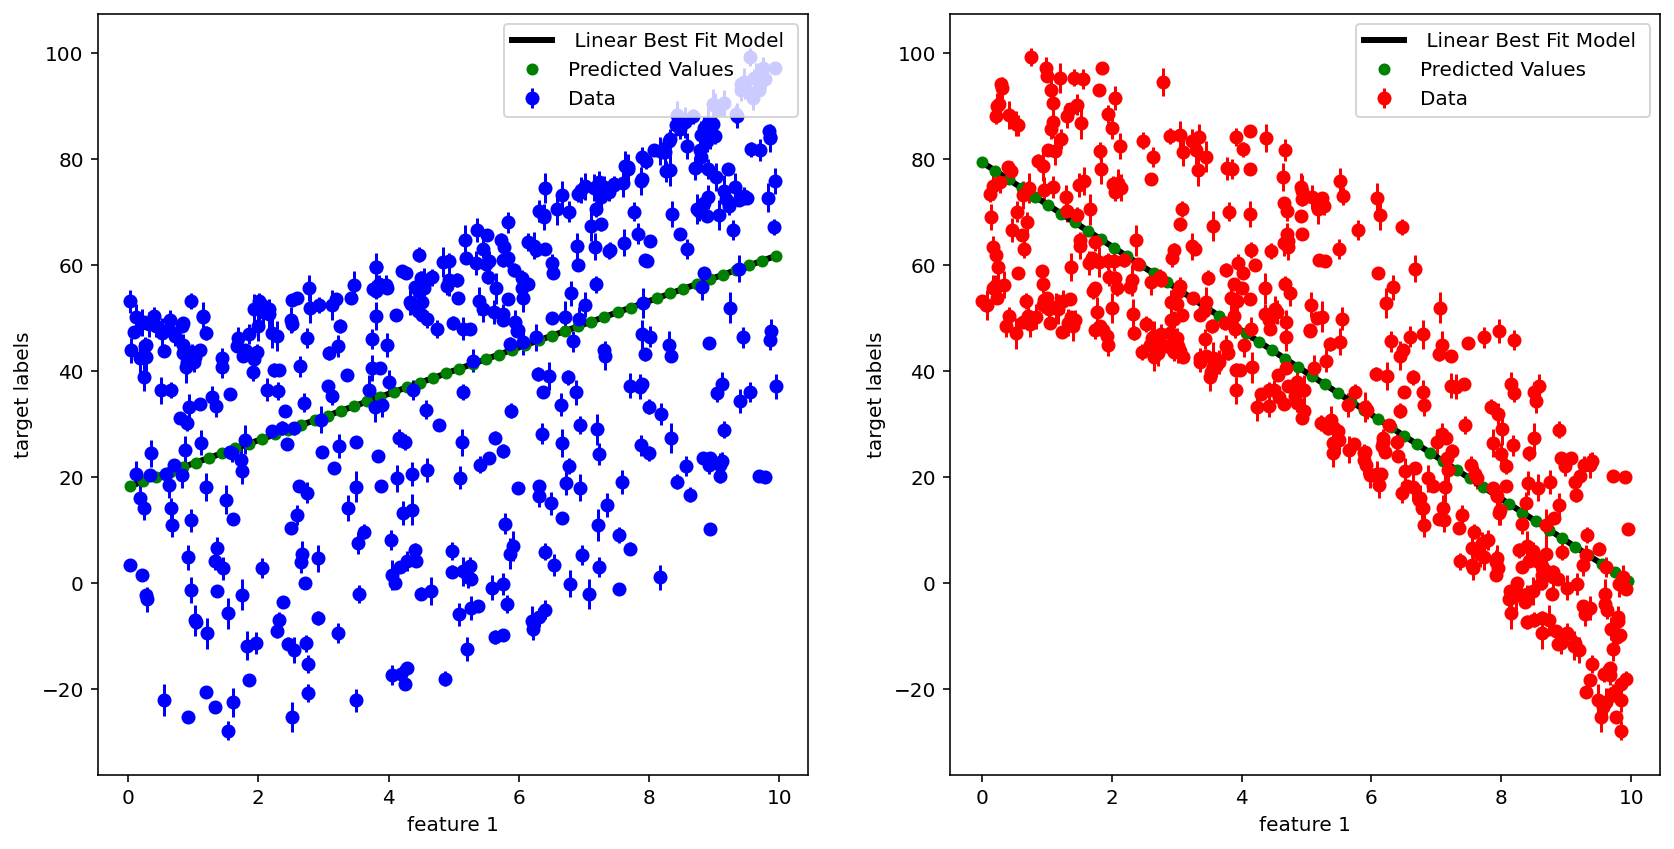

In [4]:
'''
In this block of code I separtated each feature and fitted a LinearRegression model for each feature separately

'''


from astroML.linear_model import LinearRegression

Xgrid_fe1 = np.linspace(X[:,0].min(), X[:,0].max(), 50 ).reshape(50, 1)
Xgrid_fe2 = np.linspace(X[:,1].min(), X[:,1].max(), 50 ).reshape(50,1)

#ytest_fe1 = np.random.normal(Xtest[:,0] + Xtest[:,1], dytest) # y = 0 + 1*x1 + 1*x2
#model.fit(X[:,0], y, y_err)

model_fe1 = LinearRegression()
X_1 = X_1.reshape(500,1)
model_fe1.fit(X_1, y, y_err)

model_fe2 = LinearRegression()
X_2 = X_2.reshape(500,1)
model_fe2.fit(X_2, y, y_err)

print('Intercept Feature 1 : {:.2f}'.format(model_fe1.coef_[0]))
print('Slope Feature 1 : {:.2f}'.format(model_fe1.coef_[1]))
print('')
print('Intercept Feature 2 : {:.2f}'.format(model_fe2.coef_[0]))
print('Slope Feature 2 : {:.2f}'.format(model_fe2.coef_[1]))


y_pred_fe1 = model_fe1.predict(Xgrid_fe1)
y_pred_fe2 = model_fe2.predict(Xgrid_fe2)
print('')
print('Feature 1 prediction of 50 values : ' + str(y_pred_fe1))
print('')
print('Feature 2 prediction of 50 values :  ' + str(y_pred_fe2))


fig = plt.figure(figsize=(14,7))
fe1 = fig.add_subplot(121)
fe1.errorbar(X[:,0],y, yerr= y_err,  color = 'b', marker = 'o', ls='none', label = 'Data')
fe1.plot(Xgrid_fe1, (model_fe1.coef_[0] + model_fe1.coef_[1]*Xgrid_fe1), 'k', lw = 3, label = ' Linear Best Fit Model ')
fe1.plot(Xgrid_fe1,  y_pred_fe1, 'og', ms = 5, label = 'Predicted Values')
fe1.set_ylabel('target labels')
fe1.set_xlabel('feature 1')
fe1.legend(loc = 'upper right')


fe2 = fig.add_subplot(122)
fe2.errorbar(X[:,1],y, yerr =y_err, color = 'r', marker = 'o', ls='none', label = 'Data')
fe2.plot(Xgrid_fe2,  model_fe2.coef_[0] + model_fe2.coef_[1]*Xgrid_fe2, 'k', lw = 3, label = ' Linear Best Fit Model ')
fe2.plot(Xgrid_fe2,  y_pred_fe2, 'og', ms = 5, label = 'Predicted Values')
fe2.set_ylabel('target labels')
fe2.set_xlabel('feature 1')
fe2.legend(loc = 'upper right')


#plt.plot(Xgrid_fe1, (model.coef_[0] + model.coef_[1]*Xgrid_fe1))
#plt.plot(Xgrid_fe2,  model.coef_[0] + model.coef_[2]*Xgrid_fe2)

(500, 2)
[57.10102323  4.94873016 -8.30023407]
(2500, 2)
Prediction of 50 values : [57.2126088  58.21412487 59.21564093 ... 21.73052576 22.73204183
 23.73355789]


/Users/csuarez/opt/anaconda3/envs/sun2/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


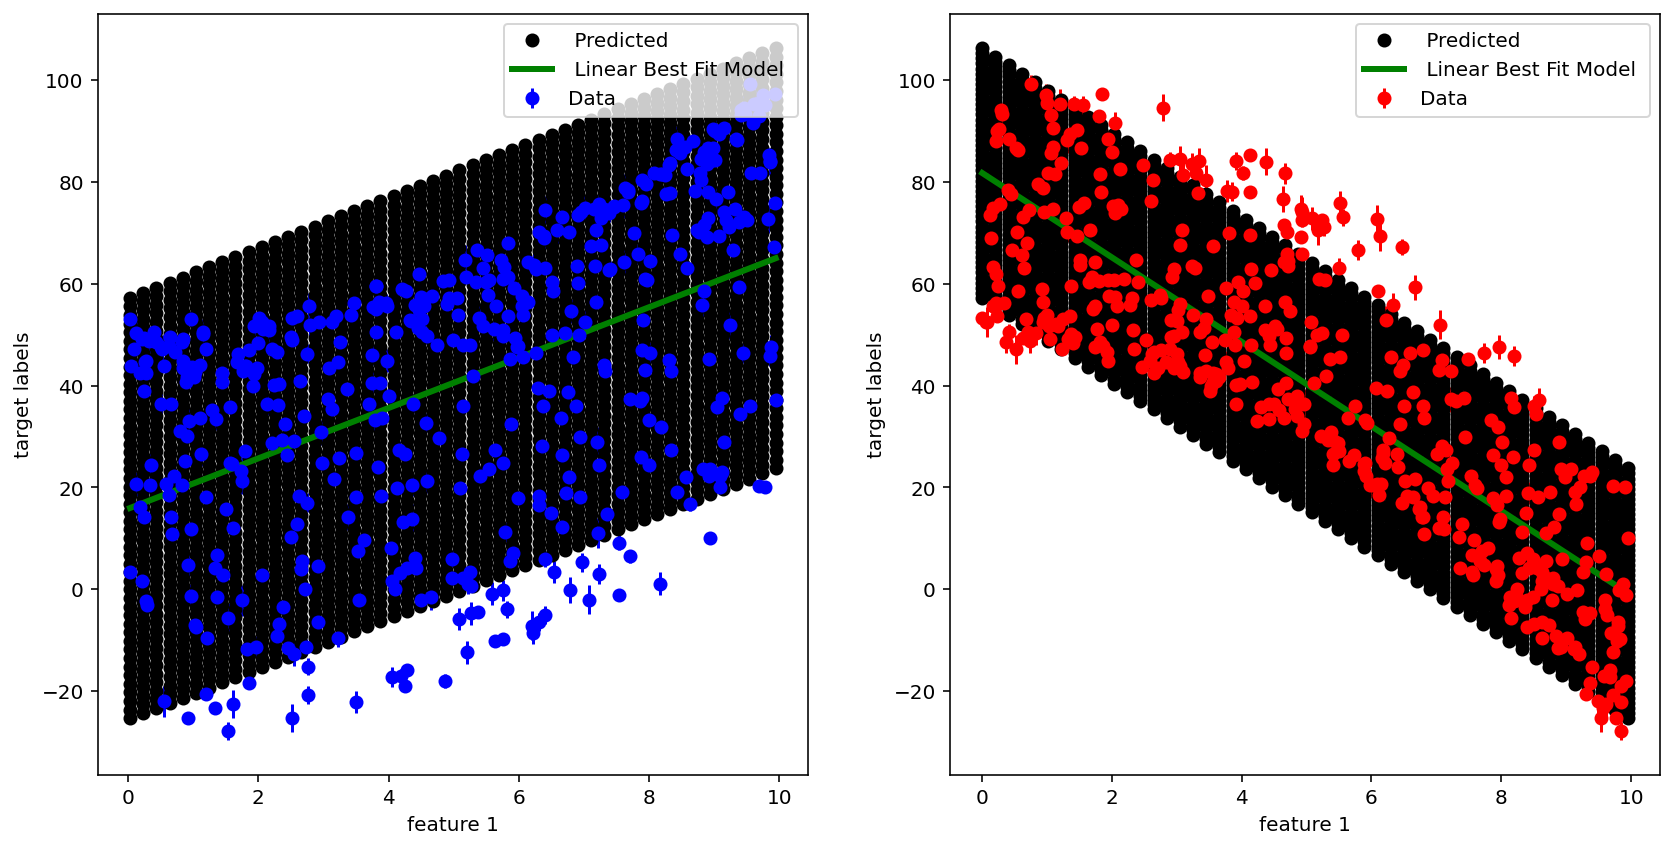

In [5]:
'''
In this block of code I kept each feature in the same 'X array' and fitted one LinearRegression model for both features

'''
from astroML.linear_model import LinearRegression


Xgrid_fe1_2 = np.linspace(X[:,0].min(), X[:,0].max(), 50 )
Xgrid_fe2_2 = np.linspace(X[:,1].min(), X[:,1].max(), 50 )
#Xgrid_test = np.array([Xgrid_fe1_2, Xgrid_fe2_2]).T
Xgrid_test = np.vstack(map(np.ravel, np.meshgrid(Xgrid_fe1_2, Xgrid_fe2_2))).T


#ytest_fe1 = np.random.normal(Xtest[:,0] + Xtest[:,1], dytest) # y = 0 + 1*x1 + 1*x2
#model.fit(X[:,0], y, y_err)


print(X.shape)

model = LinearRegression()
model.fit(X, y, y_err)
print(model.coef_)

#print('Intercept : {:.2f}'.format(model.coef_[0]))
#print('Slope Feature 1 : {:.2f}'.format(model.coef_[1]))
#print('Slope Feature 2 : {:.2f}'.format(model.coef_[2]))
print(Xgrid_test.shape)

y_pred_all_fe = model.predict(Xgrid_test)
#y_pred_fe2 = model.predict(Xgrid_fe2_2)

print('Prediction of 50 values : ' + str(y_pred_all_fe))


fig = plt.figure(figsize=(14,7))
fe1 = fig.add_subplot(121)
fe1.errorbar(X[:,0],y, yerr= y_err,  color = 'b', marker = 'o', ls='none', label = 'Data')
fe1.plot(Xgrid_test[:,0], y_pred_all_fe , 'ok', lw = 4, label = ' Predicted ')
fe1.plot(Xgrid_test[:,0], model.coef_[0] + model.coef_[1]*Xgrid_test[:,0] +  model.coef_[2]*np.mean(Xgrid_test[:,1]), 'g', ls = '-', lw = 3, label = ' Linear Best Fit Model ')

fe1.set_ylabel('target labels')
fe1.set_xlabel('feature 1')
fe1.legend(loc = 'upper right')


fe2 = fig.add_subplot(122)
fe2.errorbar(X[:,1],y, yerr =y_err, color = 'r', marker = 'o', ls='none', label = 'Data')
fe2.plot(Xgrid_test[:,1], y_pred_all_fe , 'ok', lw = 4, label = ' Predicted ')
#Using hyperplane equation from above
fe2.plot(Xgrid_test[:,1], model.coef_[0] + model.coef_[1]*np.mean(Xgrid_test[:,0]) +  model.coef_[2]*(Xgrid_test[:,1]), 'g', ls = '-', lw = 3, label = ' Linear Best Fit Model ')

fe2.set_ylabel('target labels')
fe2.set_xlabel('feature 1')
fe2.legend(loc = 'upper right')


#plt.plot(Xgrid_fe1, (model.coef_[0] + model.coef_[1]*Xgrid_fe1))
#plt.plot(Xgrid_fe2,  model.coef_[0] + model.coef_[2]*Xgrid_fe2)

The linear best fit model does ok matching the data when the one of the features is compressed to its mean. 

In [ ]:
y_pred_all_fe

In [ ]:
Xgrid_test.shape

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [6]:
X1_mesh, X2_mesh  = np.meshgrid(Xgrid_fe1_2,Xgrid_fe2_2) #list
#(X_mesh[0][0][0])
#X_mesh

Xgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid_fe1_2, Xgrid_fe2_2))).T
Xgrid.shape

/Users/csuarez/opt/anaconda3/envs/sun2/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


(2500, 2)

In [7]:
#hyperplane_LR =  model.coef_[0] + model.coef_[1]*X[:,0] +  model.coef_[2]*X[:,1]
hyperplane_LR =  model.coef_[0] + model.coef_[1]*X1_mesh +  model.coef_[2]*X2_mesh

#len(hyperplane_LR[0])
hyperplane_LR
hyperplane_LR.shape

(50, 50)

In [8]:
Xgrid[:,1].flatten().shape

(2500,)

<IPython.core.display.Javascript object>


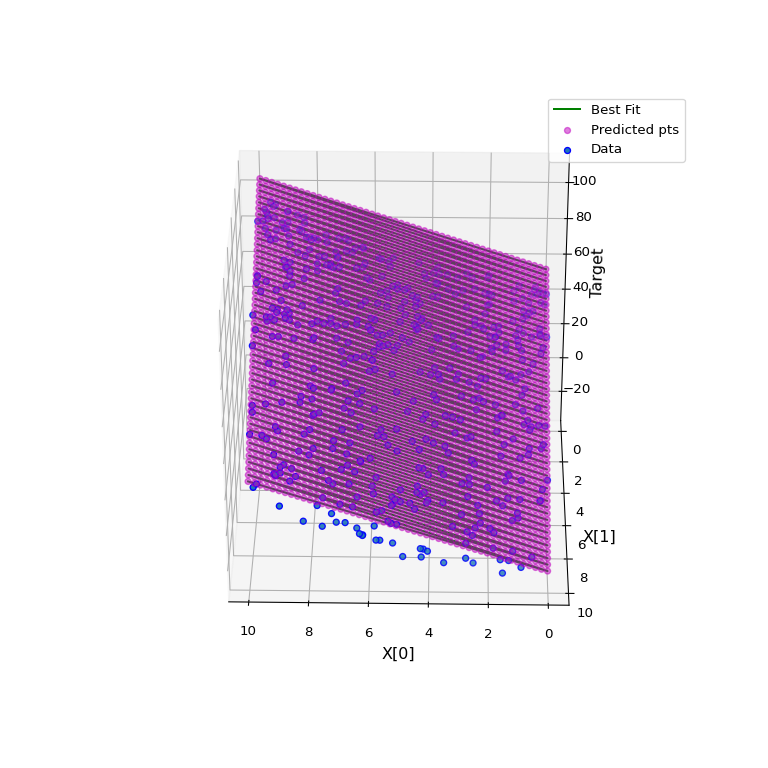

In [9]:
# Makes the plot interactive. 
# You can pan the image.

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_all_fe, color='m', alpha=0.5, label = 'Predicted pts')

ax.plot(X1_mesh.flatten(), X2_mesh.flatten(), hyperplane_LR.flatten(), color='g', label = 'Best Fit') 

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
            s=20, 
           edgecolor='b', label = 'Data')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.view_init(elev=28, azim=120)
ax.legend(loc='upper right')

In [ ]:
# To turn off interactive plotting
#%matplotlib inline

In [ ]:
X2_mesh.shape

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

K = 5 # 5-fold cross validation
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid = GridSearchCV(Ridge(), ridge_params, cv = K)
grid.fit(X,y, sample_weight=1/y_err**2)
alpha_opt = grid.best_params_['alpha']
solver_opt = grid.best_params_['solver']
print('Best alpha = ', alpha_opt)
print('Best solver = ',solver_opt)
print('Best score', grid.best_score_)


ridge_model = Ridge(alpha = alpha_opt, solver = solver_opt )
ridge_model.fit(X, y, sample_weight=1/y_err**2 )
y_pred_ridge = ridge_model.predict(Xgrid_test)

print('Ridge model coef ', ridge_model.coef_)
y_fit_ridge = ridge_model.intercept_ + ridge_model.coef_[0]*X1_mesh +  ridge_model.coef_[1]*X2_mesh

ridge_cv = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0])
ridge_cv.fit(X, y, sample_weight=1/y_err**2)
#ridge_cv.score(X, y)
print('RidgeCV alpha : ', ridge_cv.alpha_)

if(ridge_cv.alpha_ == alpha_opt):
    print('Both GridSearchCV and RidgeCV agree on the alpha value')
else: 
    print('GridSearchCV and RidgeCV do not agree on the alpha value')

    
y_pred_ridge_cv = ridge_cv.predict(Xgrid_test)

y_fit_ridge_cv = ridge_cv.intercept_ + ridge_cv.coef_[0]*X1_mesh +  ridge_cv.coef_[1]*X2_mesh


'''
From Lecture Notes using GridSearchCV and Ridge 

from sklearn.neighbors import KernelDensity

bwrange = np.linspace(0.1, 1.0, 30)# Test 30 bandwidths from 0.1 to 1.0
#print(bwrange)
K = 5 # Do 5-fold cross 
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) # Try each bandwidth with K-folds
grid.fit(x[:, None]) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print(h_opt)



X = np.random.random((100,10))
y = np.dot(X, np.random.random(10))
model = Ridge(alpha=0.05) # alpha here is lambda in the book
model.fit(X,y)
y_pred = model.predict(X)


from sklearn.linear_model import LassoCV

lasso_scaled_cv = LassoCV(cv=5).fit(Xscaled,y)

print(lasso_scaled_cv.coef_, lasso_scaled_cv.intercept_)
print(lasso_scaled_cv.alpha_)
'''


Best alpha =  1.0
Best solver =  lsqr
Best score 0.929182742615996
Ridge model coef  [ 4.94668225 -8.29685933]
RidgeCV alpha :  1.0
Both GridSearchCV and RidgeCV agree on the alpha value


"\n\n\nfrom sklearn.neighbors import KernelDensity\n\nbwrange = np.linspace(0.1, 1.0, 30)# Test 30 bandwidths from 0.1 to 1.0\n#print(bwrange)\nK = 5 # Do 5-fold cross \ngrid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) # Try each bandwidth with K-folds\ngrid.fit(x[:, None]) #Fit the histogram data that we started the lecture with.\nh_opt = grid.best_params_['bandwidth']\nprint(h_opt)\n\n\n\nX = np.random.random((100,10))\ny = np.dot(X, np.random.random(10))\nmodel = Ridge(alpha=0.05) # alpha here is lambda in the book\nmodel.fit(X,y)\ny_pred = model.predict(X)\n\n\nfrom sklearn.linear_model import LassoCV\n\nlasso_scaled_cv = LassoCV(cv=5).fit(Xscaled,y)\n\nprint(lasso_scaled_cv.coef_, lasso_scaled_cv.intercept_)\nprint(lasso_scaled_cv.alpha_)\n"

In [ ]:
y_pred_ridge.shape

<IPython.core.display.Javascript object>


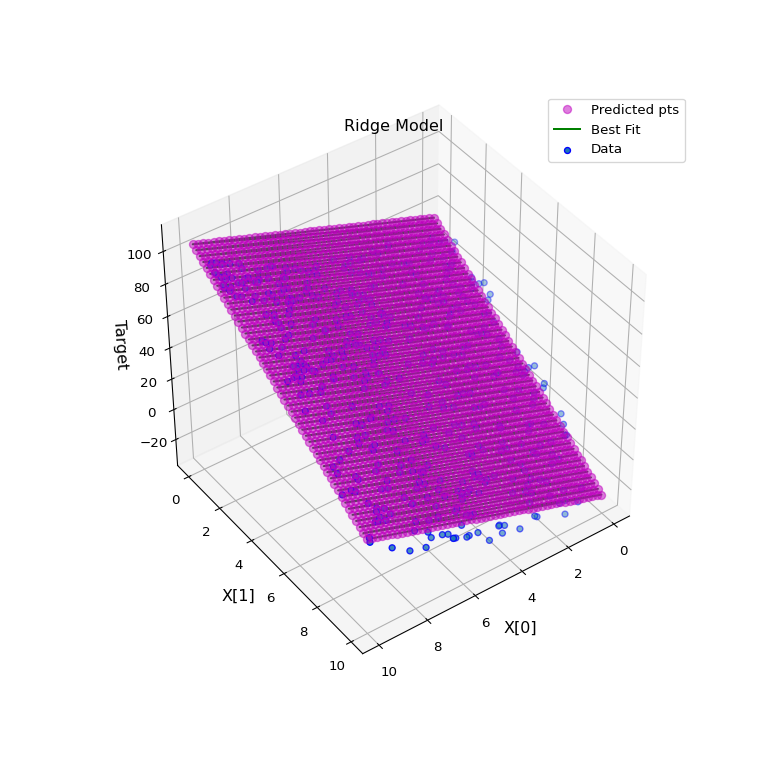

In [11]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_ridge, color='m', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label = 'Predicted pts')

ax.plot(X1_mesh.flatten(), X2_mesh.flatten(), y_fit_ridge.flatten(), color='g', label = 'Best Fit') 

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
            s=20, 
           edgecolor='b', label = 'Data')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
ax.set_title('Ridge Model')
ax.legend(loc='upper right')

<IPython.core.display.Javascript object>


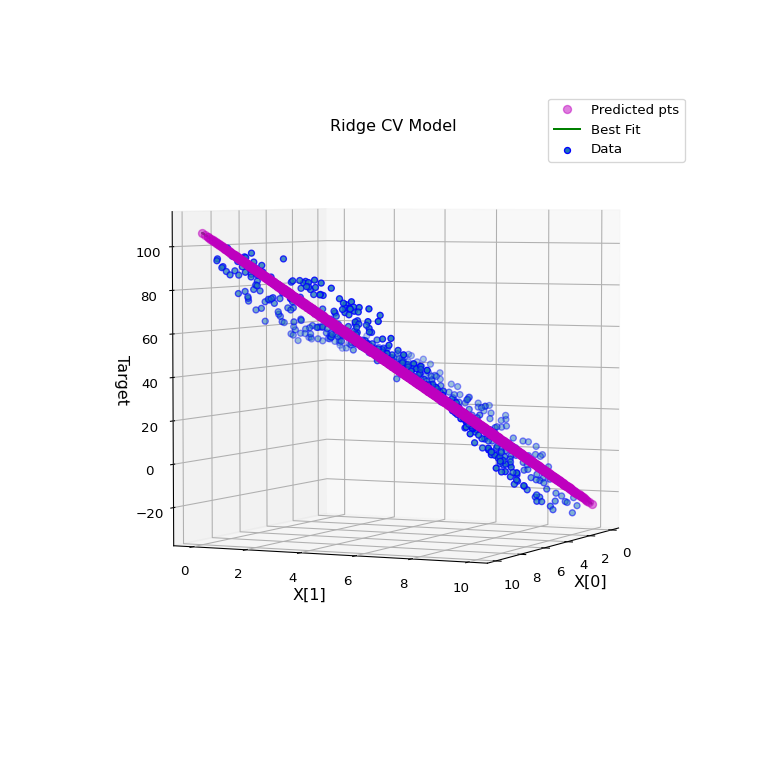

In [12]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_ridge_cv, color='m', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label = 'Predicted pts')

ax.plot(X1_mesh.flatten(), X2_mesh.flatten(), y_fit_ridge_cv.flatten(), color='g', label = 'Best Fit') 

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
           s=20, 
           edgecolor='b', label = 'Data')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
ax.set_title('Ridge CV Model')
ax.legend(loc='upper right')


In [ ]:
#%matplotlib inline

5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?

In [13]:
from astroML.linear_model import NadarayaWatson
NW_model = NadarayaWatson('gaussian',h=0.2)
NW_model.fit(X, y, dy = y_err)
y_pred_NW = NW_model.predict(Xgrid_test)


<IPython.core.display.Javascript object>


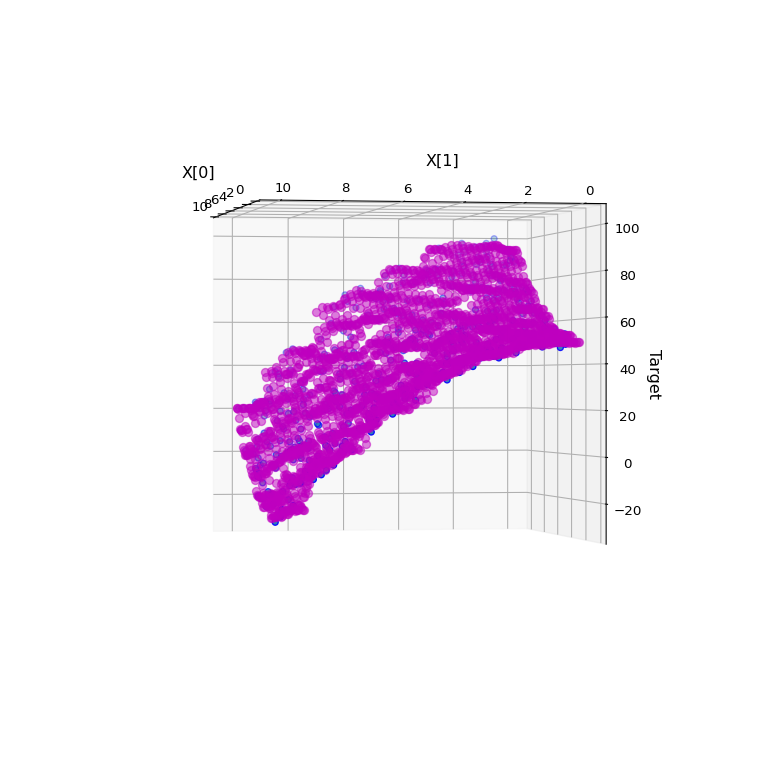

In [14]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_NW, color='m', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label = 'Predicted pts')

ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
        s=20, 
           edgecolor='b', label = 'Data')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
%matplotlib inline


In [ ]:
#%whos

6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

<IPython.core.display.Javascript object>


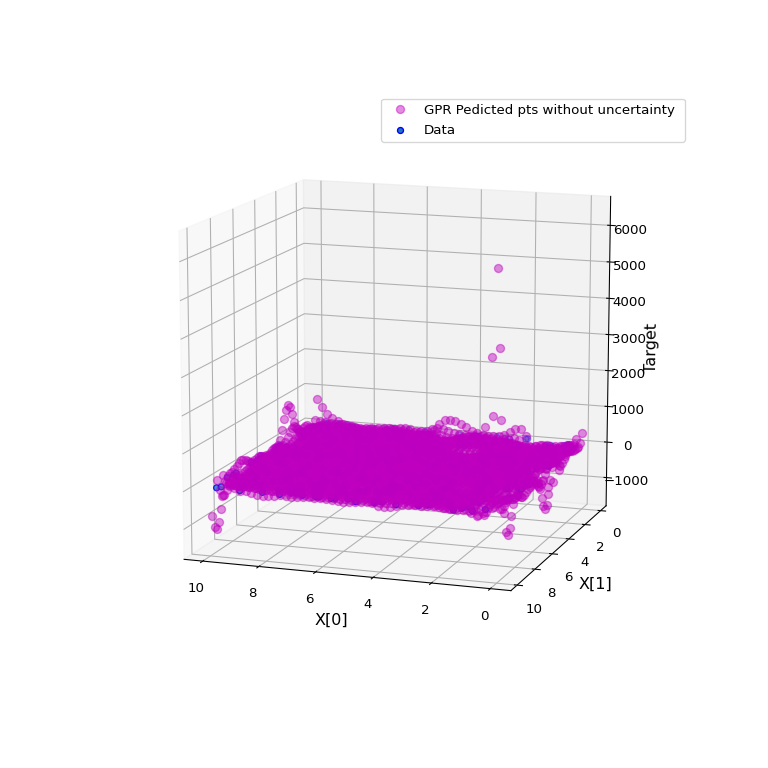

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor

#without uncertainites

GPR_model =GaussianProcessRegressor()
GPR_model.fit(X,y)
GPR_predict =GPR_model.predict(Xgrid_test)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), GPR_predict, color='m', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.45, label = 'GPR Pedicted pts without uncertainty ')


ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
            s=20, edgecolor='b', label = 'Data')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)


ax.legend(loc = 'upper right')

<IPython.core.display.Javascript object>


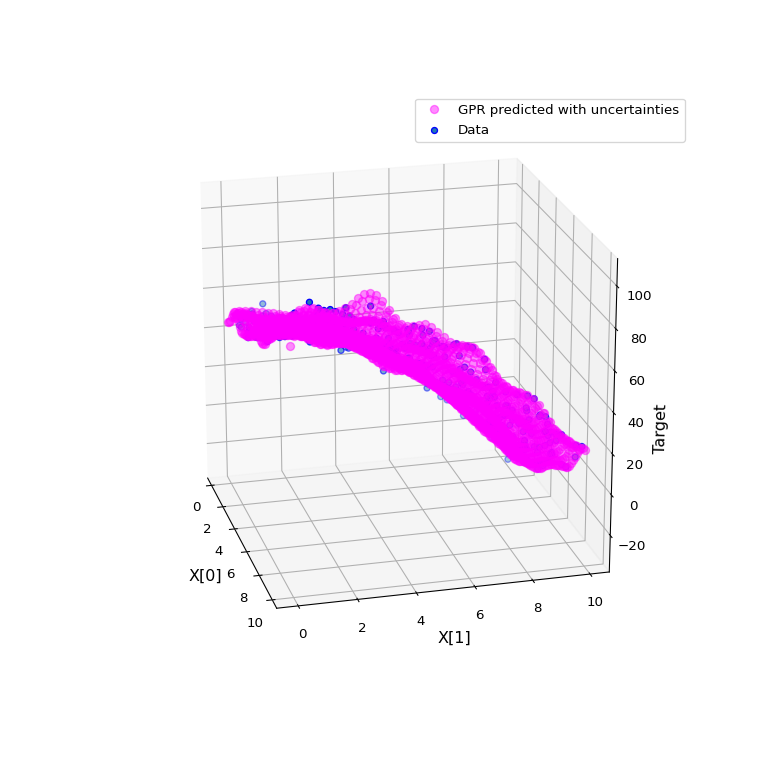

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor

#WITH uncertainites

GPR_uncert_model =GaussianProcessRegressor(alpha = (y_err/y)**2. )
GPR_uncert_model.fit(X,y)
GPR_uncert_predict =GPR_uncert_model.predict(Xgrid_test)

%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1_mesh.flatten(), X2_mesh.flatten(), GPR_uncert_predict, color='magenta', 
        zorder=15, linestyle='none', label = 'GPR predicted with uncertainties', 
        marker='o', alpha=0.45)


ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
        s=20, label = 'Data',
           edgecolor='b')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

ax.legend(loc = 'upper right')


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [17]:
from astroML.linear_model import PolynomialRegression

poly_model=PolynomialRegression(degree=4)
poly_model.fit(X,y,y_error=y_err)

print(poly_model.coef_)
print(len(poly_model.coef_))

poly_pedict = poly_model.predict(Xgrid_test)

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]
15


<IPython.core.display.Javascript object>


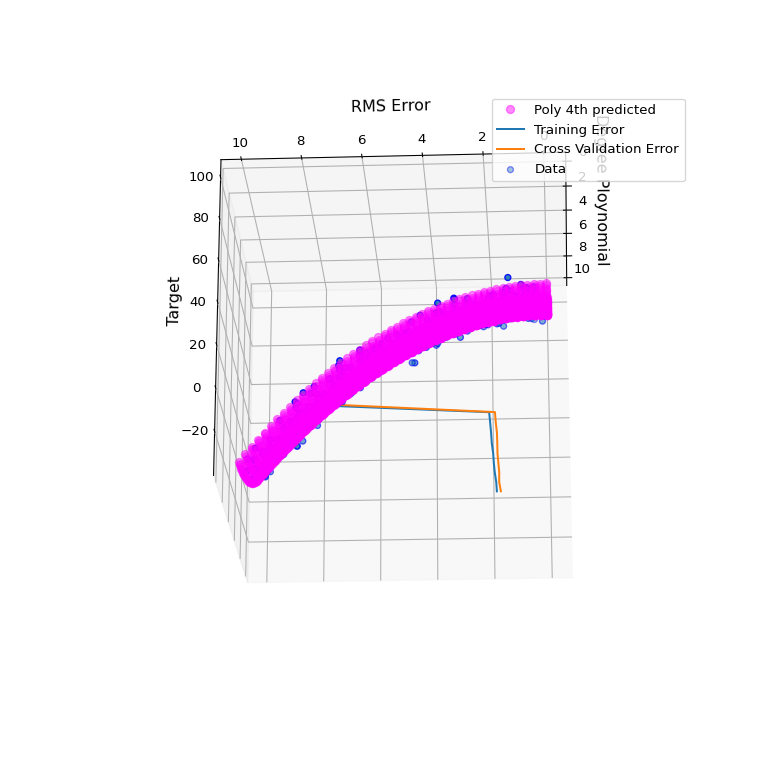

In [18]:
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1_mesh.flatten(), X2_mesh.flatten(), poly_pedict, color='magenta', 
        zorder=15, linestyle='none', label = 'Poly 4th predicted', 
        marker='o', alpha=0.45)


ax.scatter(X[:,0].flatten(), X[:,1].flatten(), y, 
        s=20, label = 'Data',
           edgecolor='b')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

ax.legend(loc = 'upper right')

I think fitting a polynomail of degree 4, might be the best one. The prevous GPR model with uncertainties, worked well, but I think it was adding too much complexity with the humps where data might not actually be there. 

8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test, y_err_train, y_err_test = train_test_split(X, y, y_err,
                                                                     test_size=0.2)


X_train_2, X_test_cv, y_train_2, y_test_cv, y_err_train_2, y_err_test_cv = train_test_split(X_train, y_train, y_err_train,
                                                                  test_size=0.2)


In [ ]:
''' From Lecture 17 

training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

for i in range(len(d)):
    p = np.polyfit(x, y, d[i])
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

BIC_train = np.sqrt(len(y)) * training_err / dy + d * np.log(len(y))
BIC_crossval = np.sqrt(len(y)) * crossval_err / dy + d * np.log(len(y))
'''

In [20]:
poly_degree = np.arange(1,11,1, dtype = int) # 1..10

training_err = np.zeros(poly_degree.shape)
crossval_err = np.zeros(poly_degree.shape)

BIC_train = np.zeros(poly_degree.shape)


for index in range(len(poly_degree)):
    
    poly_model2 = PolynomialRegression(degree=poly_degree[index])
    poly_model2.fit(X_train,y_train,y_error=y_err_train)
    
    predict_y_poly = poly_model2.predict(X_train_2)
    training_err[index] = np.sqrt(np.sum((predict_y_poly - y_train_2) ** 2) / len(y_train_2))
    
    
    predict_y_poly_CV = poly_model2.predict(X_test_cv)
    crossval_err[index] = np.sqrt(np.sum((predict_y_poly_CV - y_test_cv) ** 2) / len(y_test_cv))
    
   # BIC_train[index] = np.sqrt(len(y_train))* training_err[index]/y_err_train+poly_degree[index]*np.log(len(y_train)) 


BIC_train = np.sqrt(len(y_train))*training_err/np.mean(y_err_train)+index*np.log(len(y_train))
BIC_CV = np.sqrt(len(y_test_cv))*crossval_err/np.mean(y_err_test_cv)+index*np.log(len(y_test_cv))



In [ ]:
#len(y_err_train)

In [22]:
%matplotlib inline

Text(0.5, 0, 'Degree Ploynomial')

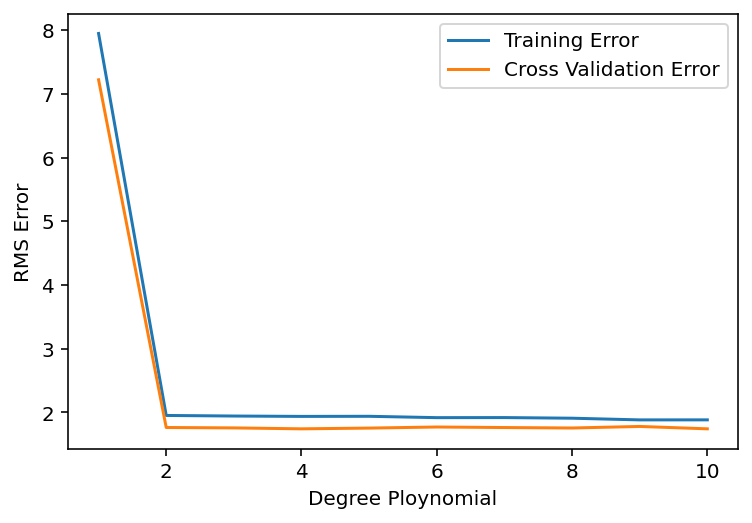

In [23]:
plt.plot(poly_degree, training_err, label = 'Training Error')
plt.plot(poly_degree, crossval_err, label = 'Cross Validation Error')
plt.legend(loc='upper right')
plt.ylabel('RMS Error')
plt.xlabel('Degree Ploynomial')


Text(0.5, 0, 'Degree Ploynomial')

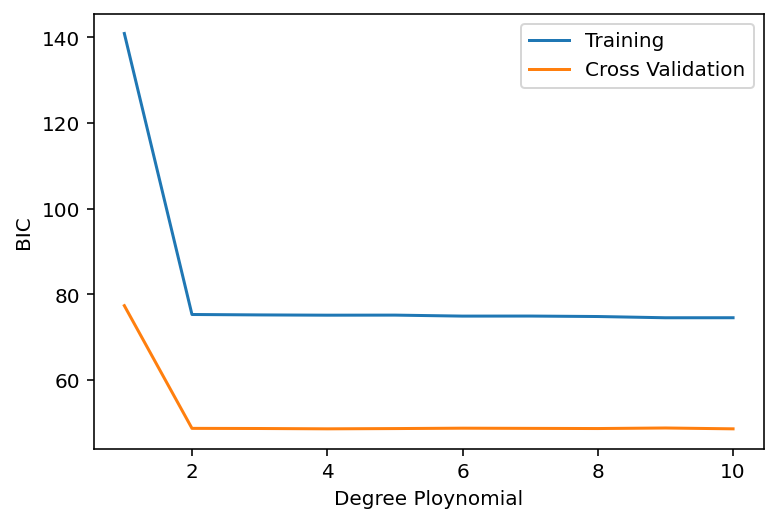

In [25]:
plt.plot(poly_degree, BIC_train, label = 'Training')
plt.plot(poly_degree, BIC_CV, label = 'Cross Validation')
plt.legend(loc='upper right')
plt.ylabel('BIC')
plt.xlabel('Degree Ploynomial')


In [26]:
#The best polynomail degree is 2 its where the 'minimum of the BIC and RMSE curves are'
best_poly_model=PolynomialRegression(degree=2)
best_poly_model.fit(X_train,y_train,y_error=y_err_train)

predict_best_poly = best_poly_model.predict(X_test)

test_rms =np.sqrt(np.sum((predict_best_poly - y_test) ** 2)/ len(y_test))


print("RMS error for traing/test set is : {:.2f}".format(test_rms))

RMS error for traing/test set is : 1.95
